In [1]:
import pandas as pd

df = pd.read_csv("business-licences-hackathon.csv", sep=";")
df.head()

/opt/miniconda3/envs/573/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,FOLDERYEAR,LicenceRSN,LicenceNumber,LicenceRevisionNumber,BusinessName,BusinessTradeName,Status,IssuedDate,ExpiredDate,BusinessType,...,Street,City,Province,Country,PostalCode,LocalArea,NumberofEmployees,FeePaid,ExtractDate,Geom
0,14,2180123,14-160030,0,Golden Trim Enterprises Inc,Floorhaus,Issued,2013-12-05T19:08:53-05:00,2014-12-31,Wholesale Dealer w/ Anc. Retail,...,W 3RD AV,Vancouver,BC,CA,V5Y 1G1,Mount Pleasant,4.0,262.0,2019-07-21T16:49:13-04:00,"{""type"": ""Point"", ""coordinates"": [-123.1098925..."
1,14,2180373,14-160220,0,Tamton Networking Inc,Tam Ton Training,Issued,2014-02-26T16:08:59-05:00,2014-12-31,Instruction,...,W PENDER ST,Vancouver,BC,CA,V6B 6N9,Downtown,0.0,130.0,2019-07-21T16:49:13-04:00,"{""type"": ""Point"", ""coordinates"": [-123.1067518..."
2,14,2180374,14-160221,0,Jack W Chow Insurance Services Ltd,NaN,Issued,2013-12-06T11:57:32-05:00,2014-12-31,Office,...,E PENDER ST,Vancouver,BC,CA,V6A 1S9,Downtown,10.0,130.0,2019-07-21T16:49:13-04:00,"{""type"": ""Point"", ""coordinates"": [-123.1040791..."
3,14,2180382,14-160226,0,Time Education Inc,NaN,Cancelled,NaN,NaN,Educational,...,GRANVILLE ST,Vancouver,BC,CA,V6M 4J7,Kerrisdale,2.0,51.0,2019-07-21T16:49:13-04:00,"{""type"": ""Point"", ""coordinates"": [-123.1401383..."
4,13,2180556,13-449866,0,(Maiko Sato),Nankurunaisa Education Services,Issued,2013-12-17T16:18:45-05:00,2013-12-31,Referral Services,...,NaN,Vancouver,BC,CA,NaN,Riley Park,1.0,62.0,2019-07-21T16:49:13-04:00,NaN


In [2]:
print(df.columns)

Index(['FOLDERYEAR', 'LicenceRSN', 'LicenceNumber', 'LicenceRevisionNumber',
       'BusinessName', 'BusinessTradeName', 'Status', 'IssuedDate',
       'ExpiredDate', 'BusinessType', 'BusinessSubType', 'Unit', 'UnitType',
       'House', 'Street', 'City', 'Province', 'Country', 'PostalCode',
       'LocalArea', 'NumberofEmployees', 'FeePaid', 'ExtractDate', 'Geom'],
      dtype='object')


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569027 entries, 0 to 569026
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   FOLDERYEAR             569027 non-null  int64  
 1   LicenceRSN             569027 non-null  int64  
 2   LicenceNumber          569027 non-null  object 
 3   LicenceRevisionNumber  569027 non-null  int64  
 4   BusinessName           550020 non-null  object 
 5   BusinessTradeName      230039 non-null  object 
 6   Status                 569027 non-null  object 
 7   IssuedDate             468813 non-null  object 
 8   ExpiredDate            468490 non-null  object 
 9   BusinessType           569027 non-null  object 
 10  BusinessSubType        307658 non-null  object 
 11  Unit                   147603 non-null  object 
 12  UnitType               147543 non-null  object 
 13  House                  313356 non-null  object 
 14  Street                 313371 non-nu

In [22]:
df.groupby(by="Status")["BusinessName"].count()

Status
Cancelled                 9486
Gone Out of Business     39383
Inactive                 12378
Issued                  436548
Pending                  52225
Name: BusinessName, dtype: int64

In [21]:
df.groupby(by="BusinessName")["NumberofEmployees"].std().sort_values().dropna()

BusinessName
!Exotics BySIYTHE Corporation             0.000000e+00
Imperial Autobody Ltd                     0.000000e+00
Imperial Carpets & Rugs Ltd               0.000000e+00
Imperial Construction Ltd                 0.000000e+00
Imperial Ginseng Products Inc             0.000000e+00
                                              ...     
Amazon Canada Fulfillment Services Inc    2.640926e+03
(Devret Bosch)                            2.865551e+03
K & T Foods Ltd                           1.504038e+05
(Sergey Lipnitskiy)                       3.745225e+05
Shifeon Enterprises Ltd                   1.906663e+09
Name: NumberofEmployees, Length: 84111, dtype: float64

In [6]:
counts_of_records = df.groupby(by="BusinessName")["FOLDERYEAR"].count().sort_values()
counts_of_records

BusinessName
Kingsway Moulding & Floors Ltd             1
0746652 BC Ltd                             1
Chun Chia Wu (Chun Wu)                     1
0745070 BC Ltd                             1
0744920 BC Ltd                             1
                                        ... 
City of Vancouver                        516
Greater Vancouver Floating Home Co-Op    519
Advanced Parking Systems Ltd             678
Starbucks Coffee Canada Inc              824
Imperial Parking Canada Corporation      947
Name: FOLDERYEAR, Length: 93557, dtype: int64

In [26]:
num_of_employees = df.groupby(by="NumberofEmployees")["NumberofEmployees"].count().sort_values()
num_of_employees

NumberofEmployees
134.0          1
183.0          1
269.0          1
1251.0         1
1250.0         1
           ...  
4.0        22361
3.0        30309
2.0        53557
1.0       103307
0.0       240561
Name: NumberofEmployees, Length: 362, dtype: int64

In [4]:
import matplotlib.pyplot as plt


(0.0, 100.0)

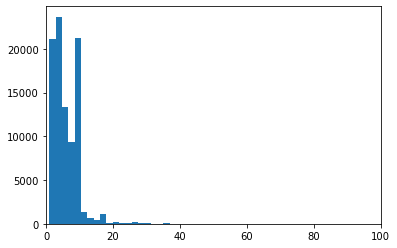

In [32]:
plt.hist(counts_of_records, bins = 500);
plt.xlim([0, 100])

(0.0, 12.0)

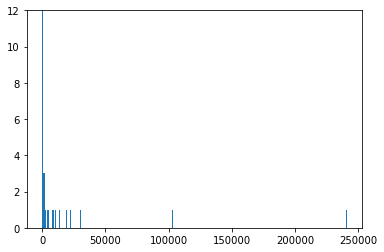

In [31]:
plt.hist(num_of_employees, bins = 500);
plt.ylim([0, 12])